In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
from sklearn.model_selection import train_test_split
X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1. kNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
k_range = range(1, 9)

scores_train = []
scores_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    scores_train.append(accuracy_score(y_train, y_pred_train))
    scores_test.append(accuracy_score(y_test, y_pred_test))

In [7]:
print(scores_train)
print(scores_test)

[1.0, 0.9923451635351427, 0.9951287404314544, 0.9909533750869868, 0.9916492693110647, 0.9902574808629089, 0.9916492693110647, 0.9909533750869868]
[0.9861111111111112, 0.9833333333333333, 0.9861111111111112, 0.9833333333333333, 0.9888888888888889, 0.9833333333333333, 0.9833333333333333, 0.9777777777777777]


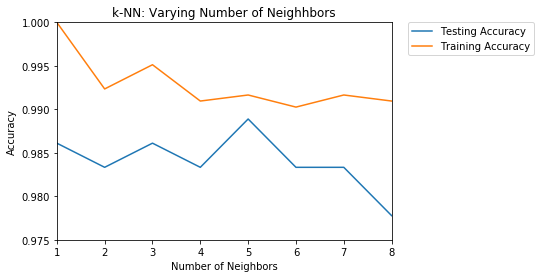

In [8]:
plt.plot(k_range, scores_test, label='Testing Accuracy')
plt.plot(k_range, scores_train, label='Training Accuracy')

plt.title('k-NN: Varying Number of Neighhbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xlim(1, 8)
plt.ylim(0.975, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 2. Support Vector Machine

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [10]:
# kernel ='linear'
SVC_linear = SVC(kernel='linear')
SVC_linear.fit(X_train, y_train)
y_linear_pred = SVC_linear.predict(X_test)
print(classification_report(y_test, y_linear_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        48
           2       0.97      1.00      0.99        35
           3       1.00      0.92      0.96        36
           4       1.00      1.00      1.00        30
           5       0.98      1.00      0.99        42
           6       1.00      0.97      0.98        33
           7       0.97      0.97      0.97        32
           8       0.95      0.92      0.94        39
           9       0.94      1.00      0.97        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [11]:
# kernel ='poly'
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train, y_train)
y_poly_pred = SVC_poly.predict(X_test)
print(classification_report(y_test, y_poly_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        36
           4       1.00      1.00      1.00        30
           5       1.00      0.98      0.99        42
           6       1.00      0.97      0.98        33
           7       1.00      0.97      0.98        32
           8       0.95      0.95      0.95        39
           9       0.91      1.00      0.95        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
# kernal='sigmoid'
SVC_sigmoid = SVC(kernel='poly')
SVC_sigmoid.fit(X_train, y_train)
y_sigmoid_pred = SVC_sigmoid.predict(X_test)
print(classification_report(y_test, y_sigmoid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        36
           4       1.00      1.00      1.00        30
           5       1.00      0.98      0.99        42
           6       1.00      0.97      0.98        33
           7       1.00      0.97      0.98        32
           8       0.95      0.95      0.95        39
           9       0.91      1.00      0.95        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
accuracy_score(y_test, y_poly_pred)

0.9833333333333333

# 3. Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [15]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

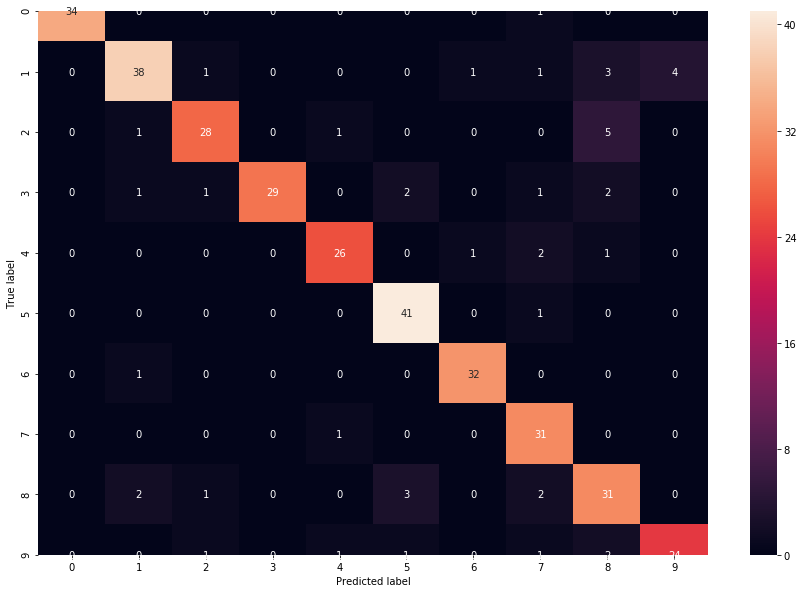

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Text(0, 0.5, 'Accuracy')

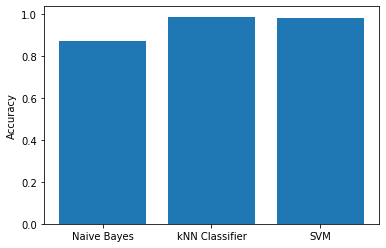

In [17]:
bayes_acc = accuracy_score(y_test, y_pred)
knn_acc = max(scores_test)
svm_acc = accuracy_score(y_test, y_poly_pred)

plt.bar(['Naive Bayes', 'kNN Classifier', 'SVM'],[bayes_acc, knn_acc, svm_acc])
plt.ylabel('Accuracy')